In [12]:
import matplotlib.pyplot as plt
plt.rc('font', family='Arial') # fonts 오류 문제

회귀분석(regression analysis)  
- Gradient Descent

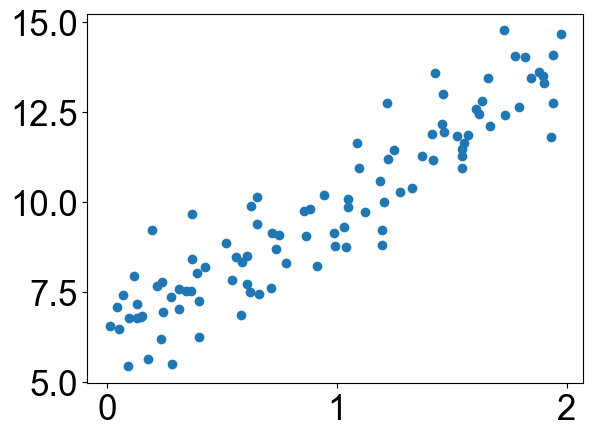

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# y=4X+6식을 근사(w1=4,w=0.6). random. 값은 noise를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

#X,y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

In [21]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X,y,learning_rate=0.01):
    N=len(y) #y = w_0+w1*x1
    #먼저 w1_update,w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1) # 벡터크기에 따라서 0 mapping시켜줘.
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산.
    y_pred = np.dot(X,w1.T) +w0 # np.matmul써도 되지만, 어차피 벡터 계산이기 때문에 dot를 씀
    #y=ax+b -> np.dot(X,w1.T)
    diff = y-y_pred # error function = (실제값-에측값)

    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성.
    w0_factors = np.ones((N,1)) #초기값 ones로 셋팅 N크기만큼 받아들이고,

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # error ftn : mse(mean square error)
    #/summation_i^n (y-y_hat)(-x_i)
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # summation_i^n (y-y_hat)(-x_1)
    
    return w1_update, w0_update #W_0,W_1 update

In [22]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
    #w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1,w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0, X,y, learning_rate=0.01)
        #learning_rate ->hyperparameter(사람이 정하는 파라미터, 정해져 있지 않음.)
        # 보통 10^(-2) ~ 10^(-6) 절대적으로 정해져 있진 않음.
        w1 = w1-w1_update #w1(왼쪽에 있는)->new, w1(오른쪽에 있는) ->old
        #w1_update = gradient descent 방법
        #new = old-update(update=0 -> new=old) #최적의 값을 찾음.
        w0 = w0-w0_update
    return w1,w0

In [23]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    print(cost)
    return cost

In [24]:
w1,w0 = gradient_descent_steps(X,y,iters=1000) #1000번을 반복
#최적의 값을 뽑고 그때의 cost값을 출력
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.818 w0:6.161
0.8074693923777707
Gradient Descent Total cost:0.8075


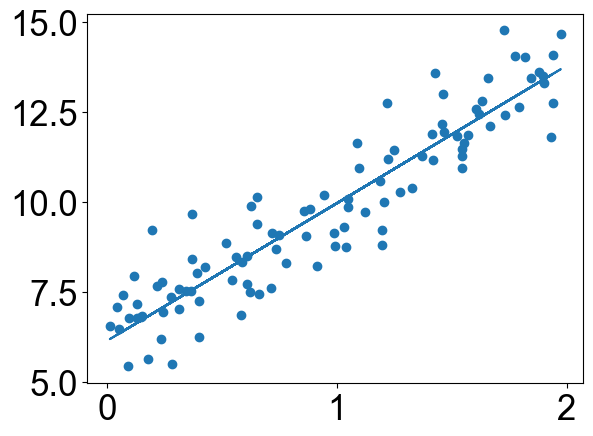

In [26]:
plt.scatter(X,y)
plt.plot(X,y_pred)

data가 적으면 gradient descent 방법을 사용할텐데, data가 굉장히 큼.
-> 미분자체가 계산량이 많아짐 / 변수가 많아서 미분이 많아짐

통계에서는 모집단(전체) -> 표본(sample) 통계량 혹은 결론

stochastic

In [39]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장 (참고 : https://medium.com/@shistory02/numpy-permutation-vs-shuffle-34fe56f0c246)
        # Stochastic gradient descent / Mini-batch graident descent (참고 : https://nonmeyet.tistory.com/entry/Batch-MiniBatch-Stochastic-%EC%A0%95%EC%9D%98%EC%99%80-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%98%88%EC%8B%9C)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [40]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.817 w0: 6.149
0.8078331972015786
Stochastic Gradient Descent Total Cost:0.8078


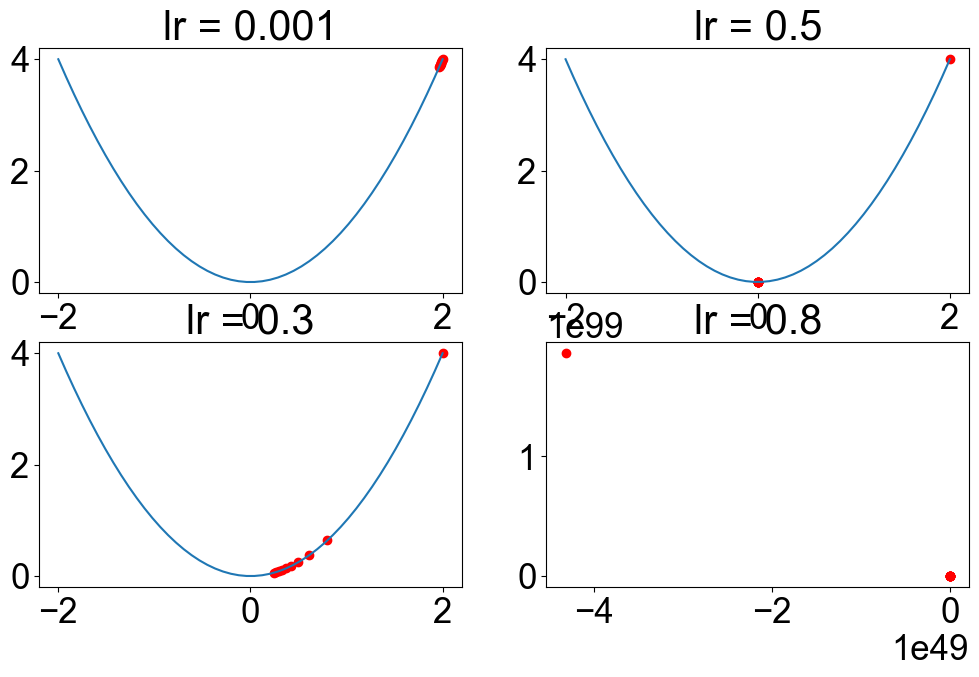

In [42]:
# 보폭에 따른 결과를 보려고 함.
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.5, 0.3, 0.8]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50) 
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()

In [44]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.0.2

^C
                                              0.0/7.2 MB ? eta -:--:--
     --                                       0.5/7.2 MB 11.1 MB/s eta 0:00:01
     ------                                   1.1/7.2 MB 11.4 MB/s eta 0:00:01
     ---------                                1.6/7.2 MB 11.5 MB/s eta 0:00:01
     -----------                              2.1/7.2 MB 11.3 MB/s eta 0:00:01
     --------------                           2.6/7.2 MB 11.2 MB/s eta 0:00:01
     ---------------                          2.8/7.2 MB 10.0 MB/s eta 0:00:01
     -----------------                        3.1/7.2 MB 9.4 MB/s eta 0:00:01
     --------------------                     3.6/7.2 MB 9.7 MB/s eta 0:00:01
     -----------------------                  4.2/7.2 MB 9.9 MB/s eta 0:00:01
     --------------------------               4.7/7.2 MB 10.0 MB/s eta 0:00:01
     -----------------------------            5.2/7.2 MB 10.1 MB/s eta 0:00:01
     --------------------------------         5.8/7.2 MB 10.

In [ ]:
import skelearn
print(sklearn.__version__)
